## Explore WRF simulations of the surface albedo

### Import modules

In [32]:
from datetime import timedelta

import cmweather
import xarray as xr
import xwrf
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### Load WRF data in January 2022 and April 2023

In [2]:
files_202201 = sorted(glob.glob("/data/home/yxie/wrf_data/jan_2022/*"))
files_202304 = sorted(glob.glob("/data/home/yxie/wrf_data/apr_2023/*"))

In [3]:
# pickd dates for each event: onset and five days after that
files_case1 = files_202201[1:7]    # daily
files_case2 = files_202201[24:30]  # daily
files_case3 = files_202304[8:32]   # every six hours

In [4]:
# double check the dates
files_case1

['/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-02.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-03.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-04.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-05.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-06.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-07.nc']

In [5]:
files_case2

['/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-25.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-26.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-27.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-28.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-29.nc',
 '/data/home/yxie/wrf_data/jan_2022/wrfhourly_d03_2022-01-30.nc']

In [6]:
files_case3

['/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-03_00:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-03_06:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-03_12:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-03_18:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-04_00:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-04_06:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-04_12:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-04_18:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-05_00:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-05_06:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-05_12:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-05_18:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-06_00:00:00',
 '/data/home/yxie/wrf_data/apr_2023/wrfout_d03_2023-04-06_06:00:00',
 '/data/home/yxie/wrf_data/apr_202

In [16]:
ds = xr.open_dataset(files_case1[0]).xwrf.postprocess()
#ds = xr.open_dataset(files_case1[0])
ds

<xarray.Dataset> Size: 78MB
Dimensions:         (Time: 24, y: 201, x: 201)
Coordinates:
  * Time            (Time) datetime64[ns] 192B 2022-01-02 ... 2022-01-02T23:0...
  * y               (y) float64 2kB -5.6e+04 -5.55e+04 ... 4.35e+04 4.4e+04
  * x               (x) float64 2kB -5.344e+04 -5.294e+04 ... 4.656e+04
Data variables: (12/22)
    Times           (Time) |S19 456B b'2022-01-02_00:00:00' ... b'2022-01-02_...
    Q2              (Time, y, x) float32 4MB ...
    T2              (Time, y, x) float32 4MB ...
    PSFC            (Time, y, x) float32 4MB ...
    U10             (Time, y, x) float32 4MB ...
    V10             (Time, y, x) float32 4MB ...
    ...              ...
    EMISS           (Time, y, x) float32 4MB ...
    HFX             (Time, y, x) float32 4MB ...
    QFX             (Time, y, x) float32 4MB ...
    LH              (Time, y, x) float32 4MB ...
    SNOWC           (Time, y, x) float32 4MB ...
    wrf_projection  object 8B +proj=lcc +x_0=0 +y_0=0 +a=6370000 +b=6370000 +...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2021-12-31_00:00:00
    WEST-EAST_GRID_DIMENSION:        202
    SOUTH-NORTH_GRID_DIMENSION:      202
    BOTTOM-TOP_GRID_DIMENSION:       50
    DX:                              500.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    history:                         Sat Mar 25 11:56:03 2023: ncrcat /global...
    NCO:                             netCDF Operators version 5.0.1 (Homepage...

### Visualize the snow albedo data

In [8]:
ds.ALBEDO

<xarray.DataArray 'ALBEDO' (Time: 24, y: 201, x: 201)> Size: 4MB
[969624 values with dtype=float32]
Coordinates:
  * Time     (Time) datetime64[ns] 192B 2022-01-02 ... 2022-01-02T23:00:00
  * y        (y) float64 2kB -5.6e+04 -5.55e+04 -5.5e+04 ... 4.35e+04 4.4e+04
  * x        (x) float64 2kB -5.344e+04 -5.294e+04 ... 4.606e+04 4.656e+04
Attributes:
    FieldType:     104
    MemoryOrder:   XY 
    description:   ALBEDO
    stagger:       
    cell_methods:  Time: mean
    grid_mapping:  wrf_projection

### Visualize snow albedo for the three cases
Case 1: control event - Jan 2-8, 2022   
Case 2: black carbon event - Jan 25-31, 2022   
Case 3: dust event - Apr 3-9, 2023  

In [9]:
dscase1_ini = xr.open_dataset(files_case1[0]).xwrf.postprocess()
dscase1_end = xr.open_dataset(files_case1[-1]).xwrf.postprocess()

dscase2_ini = xr.open_dataset(files_case2[0]).xwrf.postprocess()
dscase2_end = xr.open_dataset(files_case2[-1]).xwrf.postprocess()

# choose 18 PM UTC, which corresponds to 12 PM in local time
dscase3_ini = xr.open_dataset(files_case3[3]).xwrf.postprocess()   
dscase3_end = xr.open_dataset(files_case3[-1]).xwrf.postprocess()

### Time series of simulated snow albedo

Case 1: Control event

In [114]:
for itt in range(0, len(files_case1) ):
    ds = xr.open_dataset(files_case1[itt]).xwrf.postprocess()
    alb = ds.ALBEDO[:,124, 109].squeeze().values
    time = ds.Time.squeeze().values

    if itt == 0:
        alb1 = alb
        time1 = time
    else:
        alb1 = np.append(alb1, alb)
        time1 = np.append(time1, time) 
    

Visualize the time series

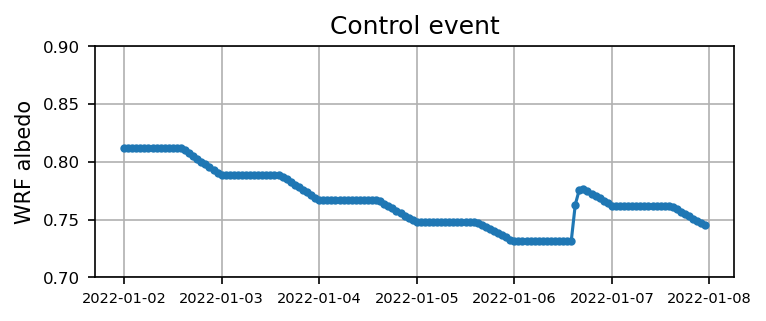

In [115]:
plt.figure(figsize=(5.5,2),dpi=150)
plt.plot(time1, alb1,'.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0.7,0.9,0.05),fontsize=8)
plt.ylabel('WRF albedo')
plt.grid()
plt.title('Control event')
plt.show()

Case 2: Black carbon event

In [116]:
for itt in range(0, len(files_case2) ):
    ds = xr.open_dataset(files_case2[itt]).xwrf.postprocess()
    alb = ds.ALBEDO[:,124,109].squeeze().values
    time = ds.Time.squeeze().values

    if itt == 0:
        alb2 = alb
        time2 = time
    else:
        alb2 = np.append(alb2, alb)
        time2 = np.append(time2, time) 
    

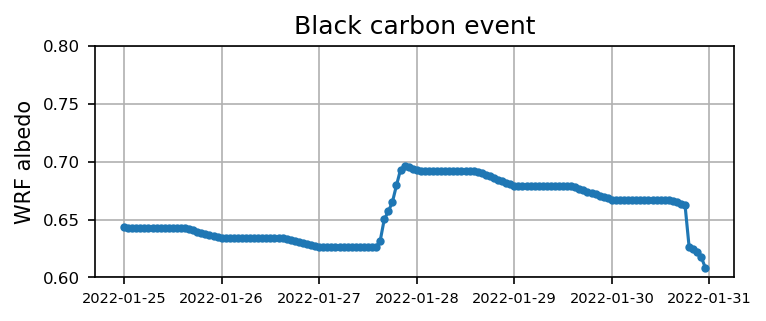

In [117]:
plt.figure(figsize=(5.5,2),dpi=150)
plt.plot(time2, alb2,'.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0.6,0.8,0.05),fontsize=8)
plt.ylabel('WRF albedo')
plt.grid()
plt.title('Black carbon event')
plt.show()

Case 3: Dust event

In [118]:
for itt in range(0, len(files_case3) ):
    ds = xr.open_dataset(files_case3[itt]).xwrf.postprocess()
    alb = ds.ALBEDO[:,124,109].squeeze().values
    time = ds.Time.squeeze().values

    if itt == 0:
        alb3 = alb
        time3 = time
    else:
        alb3 = np.append(alb3, alb)
        time3 = np.append(time3, time) 
    

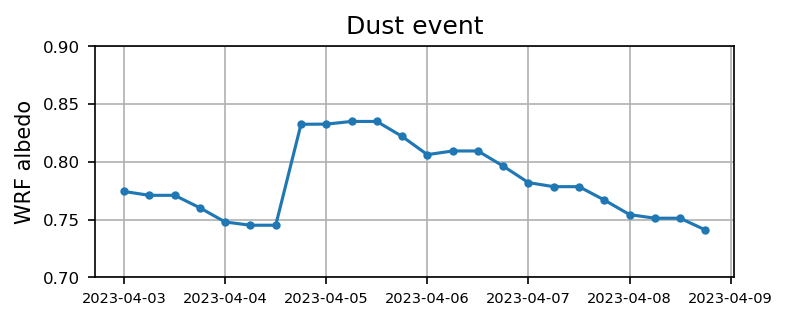

In [120]:
plt.figure(figsize=(5.5,2),dpi=150)
plt.plot(time3, alb3,'.-')
plt.xticks(fontsize=7)
plt.yticks(np.arange(0.7,0.9,0.05),fontsize=8)
plt.ylabel('WRF albedo')
plt.grid()
plt.title('Dust event')
plt.show()

### Visualize albedo time series combination

([<matplotlib.axis.YTick at 0x7f29572e11d0>,
 [Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.7500000000000001, '0.75'),
  Text(0, 0.8000000000000002, '0.80'),
  Text(0, 0.8500000000000002, '0.85'),
  Text(0, 0.9000000000000002, '0.90'),
  Text(0, 0.9500000000000003, '0.95')])

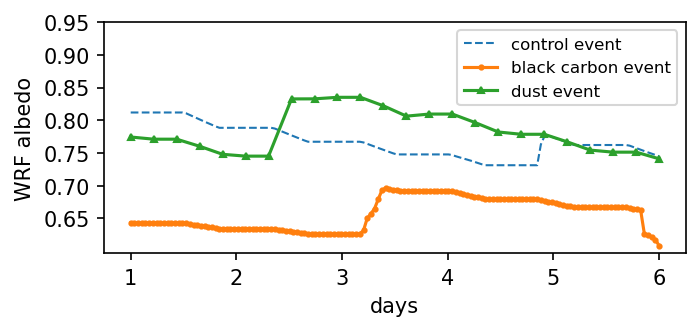

In [121]:
plt.figure(figsize=(5,2), dpi=150)

plt.plot(np.arange(0, alb1.size)/(alb1.size-1)*5 + 1, alb1, '--', linewidth=1, label='control event')
plt.plot(np.arange(0, alb2.size)/(alb2.size-1)*5 + 1, alb2, 'o-', markersize=2, label='black carbon event')
plt.plot(np.arange(0, alb3.size)/(alb3.size-1)*5 + 1, alb3, '^-', markersize=3, label='dust event')

plt.xlabel('days')
plt.ylabel('WRF albedo')
plt.legend(fontsize=8)
plt.yticks(np.arange(0.65, 1.00, 0.05))

In [10]:
# get the longitude and latitude coordinates
xlong = dscase3_ini.XLONG.copy()
xlat = dscase3_ini.XLAT.copy()

In [11]:
xlong
xlat

<xarray.DataArray 'XLAT' (y: 201, x: 201)> Size: 162kB
array([[38.38703 , 38.387066, 38.38709 , ..., 38.387497, 38.387466,
        38.387444],
       [38.391594, 38.391624, 38.39166 , ..., 38.392063, 38.392033,
        38.392006],
       [38.396156, 38.396194, 38.39622 , ..., 38.396633, 38.396603,
        38.396572],
       ...,
       [39.290962, 39.290997, 39.291027, ..., 39.29144 , 39.291416,
        39.291378],
       [39.29553 , 39.29556 , 39.295597, ..., 39.296005, 39.29598 ,
        39.295948],
       [39.3001  , 39.30013 , 39.300156, ..., 39.300564, 39.30055 ,
        39.300514]], dtype=float32)
Coordinates:
    XLAT     (y, x) float32 162kB 38.39 38.39 38.39 38.39 ... 39.3 39.3 39.3
    XLONG    (y, x) float32 162kB -107.6 -107.6 -107.6 ... -106.5 -106.5 -106.5
    CLAT     (y, x) float32 162kB 38.39 38.39 38.39 38.39 ... 39.3 39.3 39.3
  * y        (y) float64 2kB -5.6e+04 -5.55e+04 -5.5e+04 ... 4.35e+04 4.4e+04
  * x        (x) float64 2kB -5.344e+04 -5.294e+04 ... 4.606e+04 4.656e+04
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [92]:
xlong.shape

(201, 201)

In [112]:
xlat[124,109]

<xarray.DataArray 'XLAT' ()> Size: 4B
array(38.95481, dtype=float32)
Coordinates:
    XLAT     float32 4B 38.95
    XLONG    float32 4B -107.0
    CLAT     float32 4B 38.95
    y        float64 8B 6.001e+03
    x        float64 8B 1.056e+03
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [113]:
xlong[124,109]

<xarray.DataArray 'XLONG' ()> Size: 4B
array(-106.987595, dtype=float32)
Coordinates:
    XLAT     float32 4B 38.95
    XLONG    float32 4B -107.0
    CLAT     float32 4B 38.95
    y        float64 8B 6.001e+03
    x        float64 8B 1.056e+03
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:

In [12]:
dscase1_ini.ALBEDO.mean(dim=["Time"])

<xarray.DataArray 'ALBEDO' (y: 201, x: 201)> Size: 162kB
array([[0.12567791, 0.27713156, 0.27787742, ..., 0.13806541, 0.13562445,
        0.13517445],
       [0.12720494, 0.36455992, 0.3261745 , ..., 0.5272812 , 0.5218349 ,
        0.13799016],
       [0.16911976, 0.4227103 , 0.3591574 , ..., 0.523505  , 0.56517625,
        0.14023069],
       ...,
       [0.13396809, 0.48029068, 0.4897437 , ..., 0.41331407, 0.41277325,
        0.13352953],
       [0.18808675, 0.23803009, 0.25103953, ..., 0.46812785, 0.4666935 ,
        0.13463642],
       [0.18084066, 0.12843372, 0.12848563, ..., 0.13586679, 0.13635956,
        0.13567682]], dtype=float32)
Coordinates:
  * y        (y) float64 2kB -5.6e+04 -5.55e+04 -5.5e+04 ... 4.35e+04 4.4e+04
  * x        (x) float64 2kB -5.344e+04 -5.294e+04 ... 4.606e+04 4.656e+04

/tmp/ipykernel_3207/648137882.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/648137882.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/648137882.py:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pl

Text(0.5, 1.0, '(c) Difference')

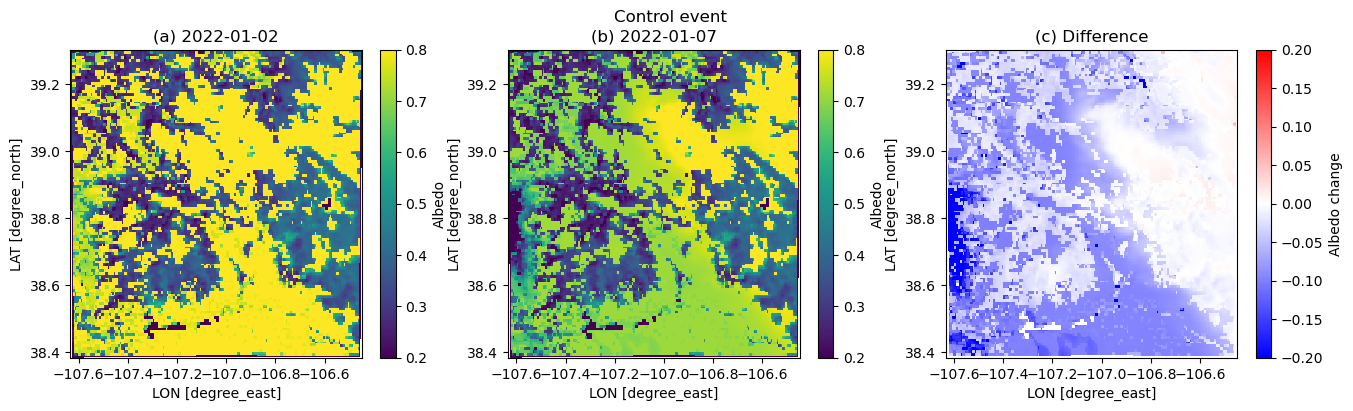

In [18]:
plt.figure(figsize=(16,4))
albini = dscase1_ini.ALBEDO[17,:,:]
albend = dscase1_end.ALBEDO[17,:,:]

plt.suptitle('Control event')

plt.subplot(1,3,1)
plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(a) 2022-01-02')

plt.subplot(1,3,2)
plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(b) 2022-01-07')

plt.subplot(1,3,3)
plt.pcolormesh(xlong, xlat, albend.squeeze() - albini.squeeze(), cmap=cm.bwr, vmin=-0.2, vmax=0.2)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo change')
plt.title('(c) Difference')

/tmp/ipykernel_3207/78071660.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/78071660.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/78071660.py:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.p

Text(0.5, 1.0, '(c) Difference')

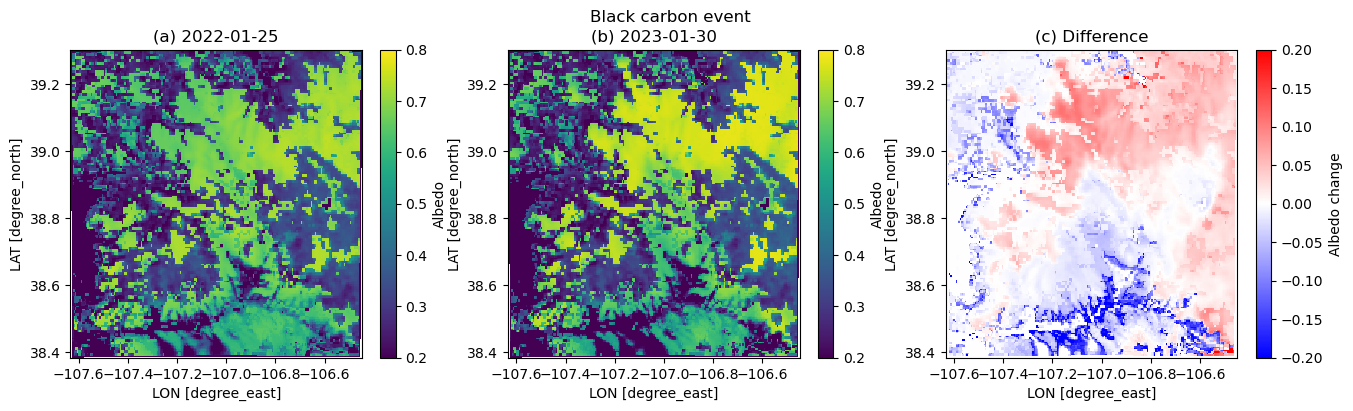

In [19]:
plt.figure(figsize=(16,4))
albini = dscase2_ini.ALBEDO[17,:,:]
albend = dscase2_end.ALBEDO[17,:,:]

plt.suptitle('Black carbon event')

plt.subplot(1,3,1)
plt.pcolormesh(xlong, xlat, albini.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(a) 2022-01-25')

plt.subplot(1,3,2)
plt.pcolormesh(xlong, xlat, albend.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(b) 2023-01-30')

plt.subplot(1,3,3)
plt.pcolormesh(xlong, xlat, albend.squeeze() - albini.squeeze(), cmap=cm.bwr, vmin=-0.2, vmax=0.2)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo change')
plt.title('(c) Difference')

/tmp/ipykernel_3207/964711993.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, dscase3_ini.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/964711993.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xlong, xlat, dscase3_end.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
/tmp/ipykernel_3207/964711993.py:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell e

Text(0.5, 1.0, '(c) Difference')

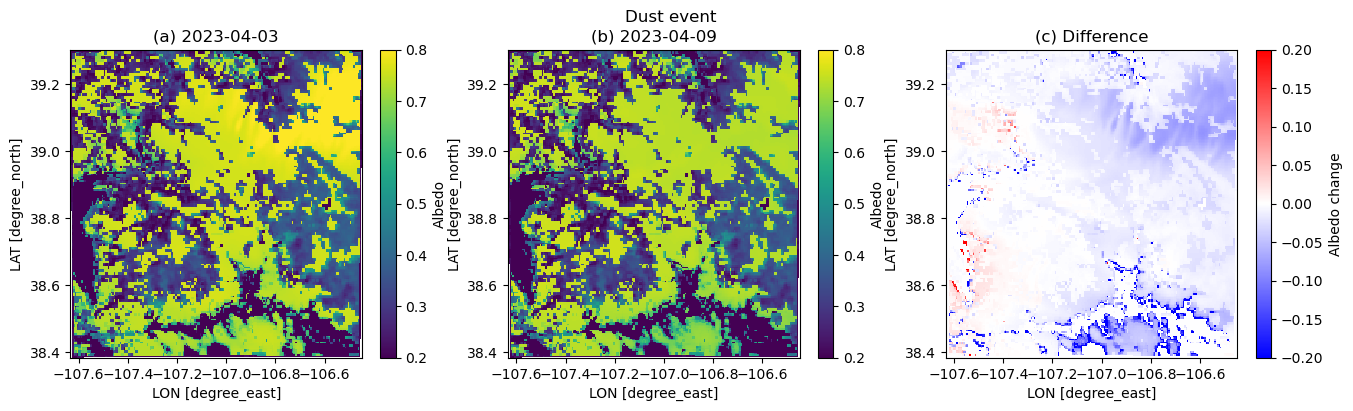

In [20]:
plt.figure(figsize=(16,4))

plt.suptitle('Dust event')

plt.subplot(1,3,1)
plt.pcolormesh(xlong, xlat, dscase3_ini.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(a) 2023-04-03')

plt.subplot(1,3,2)
plt.pcolormesh(xlong, xlat, dscase3_end.ALBEDO.squeeze(), vmin=0.2, vmax=0.8)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo')
plt.title('(b) 2023-04-09')

plt.subplot(1,3,3)
plt.pcolormesh(xlong, xlat, dscase3_end.ALBEDO.squeeze() - dscase3_ini.ALBEDO.squeeze(), cmap=cm.bwr, vmin=-0.2, vmax=0.2)
plt.xlabel('LON [degree_east]', fontsize=10)
plt.ylabel('LAT [degree_north]', fontsize=10)
plt.colorbar(label='Albedo change')
plt.title('(c) Difference')